### Import relevant libraries and packages 之后所有Import都放在这里！！

In [1179]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style='white', palette='rainbow', font_scale=1.2)
import warnings

warnings.filterwarnings('ignore')
# Import the KFold class from the sklearn library


## Data quality check / cleaning / preparation

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### JC 之后改heading
*By Julia

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [1180]:
df = pd.read_csv("data/student-mat.csv")

Text(0, 0.5, 'Count')

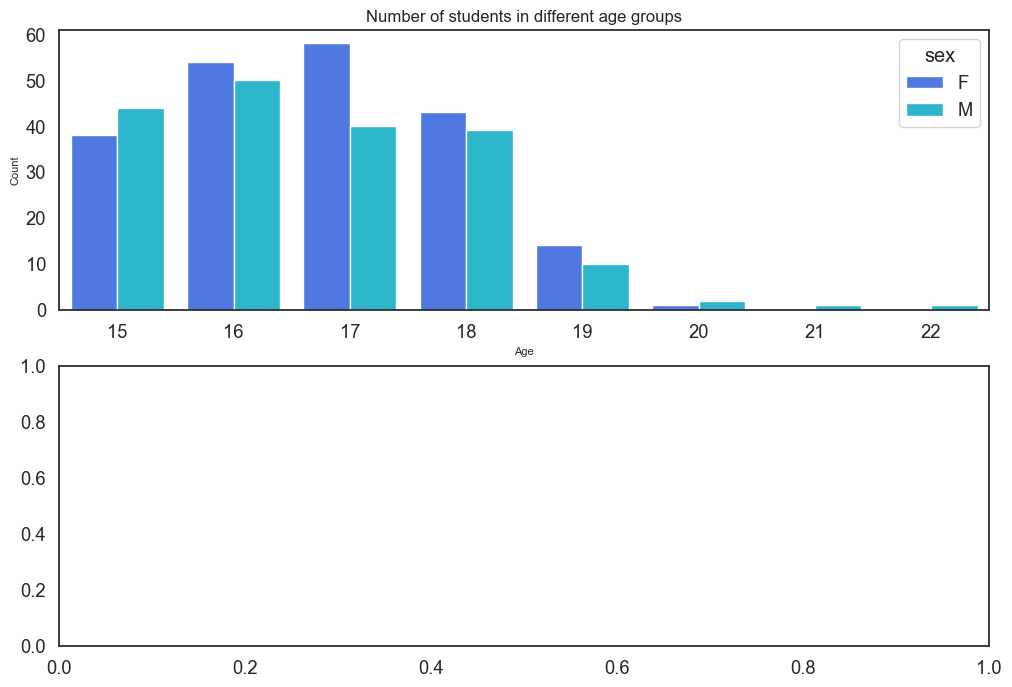

In [1196]:
### Age & Gender Distribution and its effect on grade outcome


fig, axes = plt.subplots(2, 1, figsize=(12, 8))

age_pl = sns.countplot(data=df, x='age', hue='sex', ax=axes[0])
age_pl.axes.set_title('Number of students in different age groups', fontsize=12)
age_pl.set_xlabel("Age", fontsize=8)
age_pl.set_ylabel("Count", fontsize=8)

In [ ]:
#Whether there's a gender difference in grade distribution in G1 G2 AND G3
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1 = sns.boxplot(data=df, x='sex', y='G1', ax=axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data=df, x='sex', y='G2', ax=axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data=df, x='sex', y='G3', ax=axes[2])
ax3.set_title('G3')
plt.show()

In [ ]:
age_data = df.groupby('age')['finalGrade'].agg([('pass_rate', 'mean'), ('nobs', 'count')]).reset_index(drop=False)
sns.lineplot(x=age_data.age, y=age_data['pass_rate'])
plt.xlabel('age')


In [ ]:
g = sns.catplot(
    data=df, x="sex", y="finalGrade", col="age",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "pass Rate")
g.set_xticklabels(["Male", "Female"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

In [ ]:
#Whether geography affects grade outcome 
add_plt = sns.countplot(data=df, x='address', hue="finalGrade")
add_plt.axes.set_title('Urban and Rural students', fontsize=12)
add_plt.set_xlabel('Address', fontsize=12)
add_plt.set_ylabel('Count', fontsize=12)

## Data quality check / cleaning / preparation
*By Victoria Shi*

In [1221]:
df = pd.read_csv("data/student-mat.csv")

# preview of dataset
display(df.head())

# basic information about the dataset
print(f"number of rows: {df.shape[0]}\nnumber of columns: {df.shape[1]}\ncolumn names\n{list(df.columns)}")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


number of rows: 395
number of columns: 33
column names
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [1222]:
# check missing data --> there are no missing values
df.isnull().any().sum()

0

In [1223]:
# check the datatypes in the dataframe -> there are object types and the numerical (integer) type.
display(df.dtypes)

num_col = list(df.select_dtypes(include=['int64', 'float64']))
cat_col = list(df.select_dtypes(include=['object']))
# find the exact categorical columns and integer columns respectively
print(f"numerical columns \n{num_col}\n")
print(f"categorical columns: \n{cat_col}")

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

numerical columns 
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

categorical columns: 
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [1224]:
# summary statistics (min and max) of numerical columns -- only want a rough idea of the general range of values instead of the detailed distributions, so min and max would suffice, instead of the mean or standard deviation

df.describe().loc[['min', 'max']].astype(int).T

,min,max
age,15,22
Medu,0,4
Fedu,0,4
traveltime,1,4
studytime,1,4
failures,0,3
famrel,1,5
freetime,1,5
goout,1,5
Dalc,1,5


In [1225]:
# categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

columns = []

# use loop comprehension to  store the column names and the number of unique values
[columns.append([col, df[col].nunique()]) for col in cat_columns]

tally_cat_cols = pd.DataFrame(columns, columns=['Column Name', 'Number of Unique Values'])
tally_cat_cols

,Column Name,Number of Unique Values
0,school,2
1,sex,2
2,address,2
3,famsize,2
4,Pstatus,2
5,Mjob,5
6,Fjob,5
7,reason,4
8,guardian,3
9,schoolsup,2


### Data cleaning and Preparation
*By Victoria Shi*

From the data quality check, we realized that:

1. While there are no missing values, the data set consists of many categorical variables, so we would need to either encode these variables, dummify them, or convert the data type of these columns from object to numeric.
2. For columns with a yes-no response, we implement a binary mapping of 'yes' to 1 and 'no' to 0.
3. For categorical columns with two unique values, we converted them to 0/1 binary variables, as the choice of 0/1 would not change the result.
4. For columns of categorical variables with more than 2 unique values, we could not map them to numerical values (i.e., mapping distinct values to different integer values) as it would introduce bias due to assuming one value is superior to the other. So instead, we convert them to dummy variables as new predictors.

The code below implements the above cleaning.

In [1226]:
######---------------Converting yes-no variables to binary variables----------------#########
# Create a dictionary for binary mapping
binary_mapping = {'yes': 1, 'no': 0}

# Find all columns in the data frame that have 'yes' or 'no' as the response
yes_no_columns = [col for col in df.columns if df[col].isin(['yes', 'no']).any()]

# Apply binary mapping to all columns found in the previous step using a lambda function and pandas' apply method
df[yes_no_columns] = df[yes_no_columns].apply(lambda x: x.map(binary_mapping))

In [1227]:
######---------------Transforming predictors with 2 unique values----------------#########

# map categorical variables in data to 0 or 1 if the column has two unique values
#  map the values in the 'school' column to 0 or 1
df['school'] = df['school'].map({'GP': 0, 'MS': 1})

# map the values in the 'sex' column to 0 or 1
df['sex'] = df['sex'].map({'F': 0, 'M': 1})

# map the values in the 'famsize' column to 0 or 1
# binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3
df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})

# map the values in the 'address' column to 0 or 1
# binary: 'U' - urban or 'R' - rural
df['address'] = df['address'].map({'R': 0, 'U': 1})

# map the values in the 'Pstatus' column to 0 or 1
# parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
df['Pstatus'] = df['Pstatus'].map({'A': 0, 'T': 1})

In [1228]:
######---------------Creating new predictors----------------#########
# Create dummy variables for the 'col' column
target_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
dummies = pd.get_dummies(df.loc[:, target_cols], prefix=['Mjob', 'Fjob', 'reason', 'guardian'])

df.drop(columns=target_cols, inplace=True)

# # Concatenate the original data frame with the dummy variables
df = pd.concat([df, dummies], axis=1)

# combine Dalc and Walc into alc
df.loc[:, 'Alc'] = df['Dalc'] + df['Walc']

# drop Dalc and Walc
df = df.drop(columns=['Dalc', 'Walc'])

# combine Fedu and Medu into famEdu
famEdu = df['Fedu'] + df['Fedu']

df = df.drop(columns=['Fedu', 'Fedu'])

In [1229]:
df_all_num2 = df.copy()
df_model_dev = df.copy()

# preview of dataset for training
display(df.head())
display(df.dtypes)
print(
    f"After cleaning and preparation, the dataset has {df.shape[0]} rows and {df.shape[1]} columns.\nNew columns:\n {list(df.columns)}\nAll columns are of uint8 or integer data types.")

,school,sex,age,address,famsize,Pstatus,Medu,traveltime,studytime,failures,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,Alc
0,0,0,18,1,1,0,4,2,2,0,...,0,1,1,0,0,0,0,1,0,2
1,0,0,17,1,1,1,1,1,2,0,...,0,0,1,0,0,0,1,0,0,2
2,0,0,15,1,0,1,1,1,2,3,...,0,0,0,0,1,0,0,1,0,5
3,0,0,15,1,1,1,4,1,3,0,...,1,0,0,1,0,0,0,1,0,2
4,0,0,16,1,1,1,3,1,2,0,...,0,0,0,1,0,0,1,0,0,3


school               int64
sex                  int64
age                  int64
address              int64
famsize              int64
Pstatus              int64
Medu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetime             int64
goout                int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
r

After cleaning and preparation, the dataset has 395 rows and 44 columns.
New columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'Alc']
All columns are of uint8 or integer data types.


## Exploratory data analysis

### Part 1
*Victoria Shi*

Text(0.5, 1.0, 'Grade (Binary) Distribution')

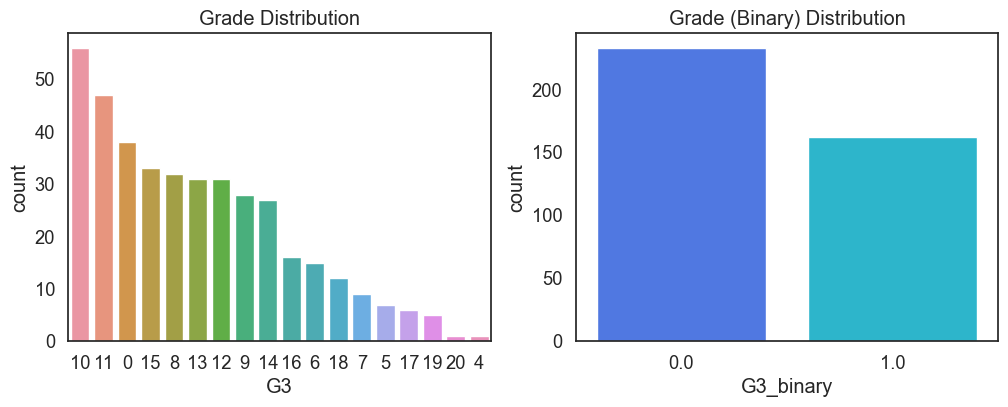

In [1231]:
data = pd.read_csv("data/student-mat.csv")
# Create a new column 'G3_binary' in the data frame
# Assign 0 to all rows where G3 is less than 12
data.loc[data.G3 < 12, 'G3_binary'] = 0

# Assign 1 to all rows where G3 is greater than or equal to 12
data.loc[data.G3 >= 12, 'G3_binary'] = 1

fig = plt.figure(figsize=(12, 4))

# Plot a count plot of the 'G3' column and set the title
fig.add_subplot(1, 2, 1)
sns.countplot(x='G3', data=data, order=data['G3'].value_counts().index).set_title("Grade Distribution")

# Plot a count plot of the 'G3_binary' column and set the title
fig.add_subplot(1, 2, 2)
sns.countplot(x=data.G3_binary, order=data.G3_binary.value_counts().index).set_title("Grade (Binary) Distribution")

Text(0.5, 1.0, 'Pairwise correlation among (innately) numerical columns')

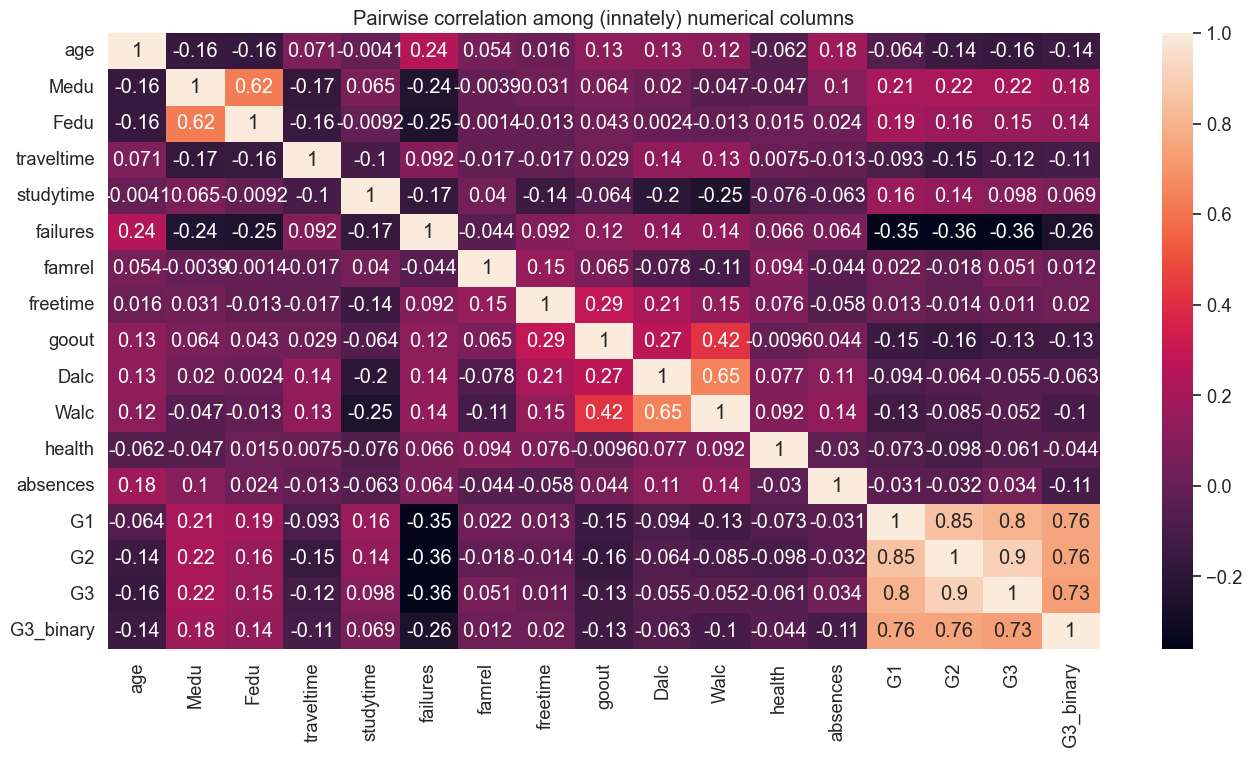

In [1232]:
plt.figure(figsize=(16, 8))
# plot the correlation among variables that are ORIGINALLy numerical
sns.heatmap(data.corr(), annot=True).set_title("Pairwise correlation among (innately) numerical columns")

Text(0.5, 1.0, 'G2 versus G3')

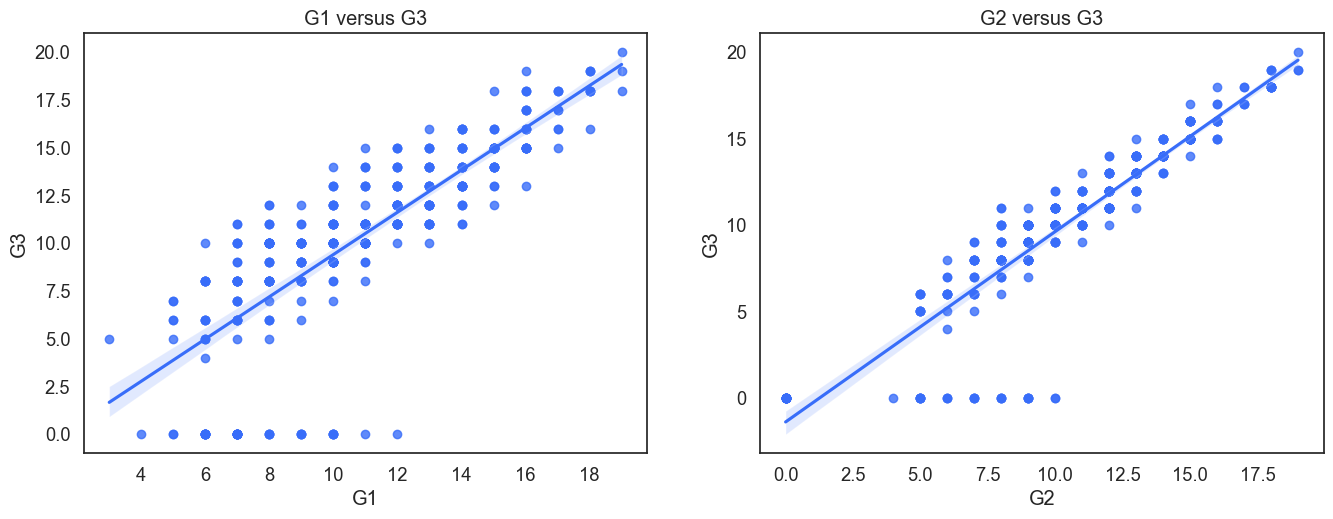

In [1233]:
fig = plt.figure(figsize=(16, 12))
fig.add_subplot(2, 2, 1)
sns.regplot(x='G1', y='G3', data=data).set_title('G1 versus G3')
fig.add_subplot(2, 2, 2)
sns.regplot(x='G2', y='G3', data=data).set_title('G2 versus G3')

In [1234]:
# Since G1, G2, and G3 are highly correlated, we remove G2 and G3
data = data.drop(columns=["G1", "G2"])

`G1` and `G2` are strongly correlated themselves and are strongly correlated with `G3`. SO we remove G1 and G2.
`Medu` and `Fedu` are strongly correlated. `Dalc` and `Walc` are strongly correlated.

In [1235]:
data['famEdu'] = data['Fedu'] + data['Medu']

data['Alc'] = data['Walc'] + data['Dalc']

data = data.drop(columns=["Fedu", 'Medu', 'Walc', 'Dalc', 'G3_binary'])

Text(0.5, 1.0, 'Pairwise correlation')

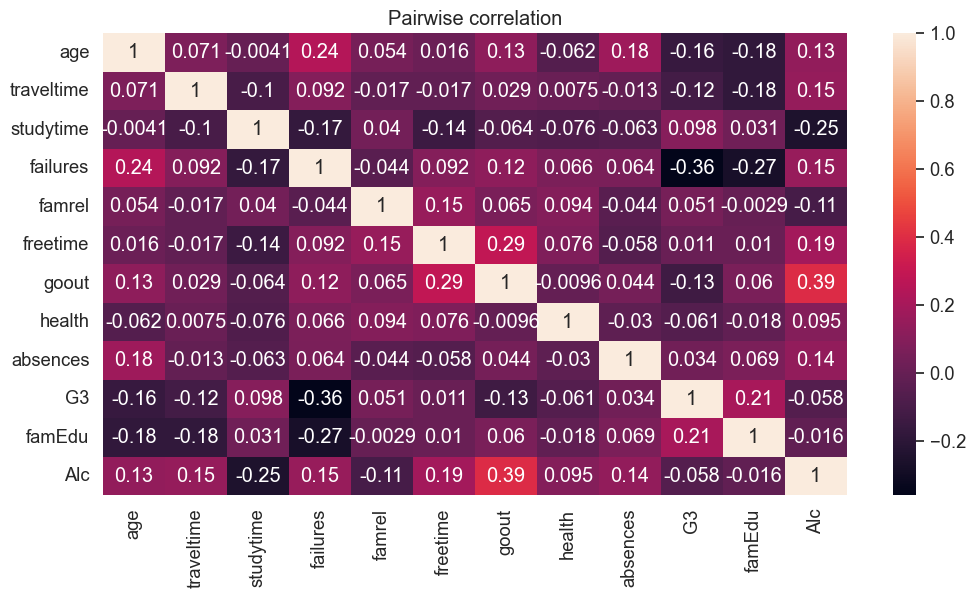

In [1236]:
fig = plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True).set_title("Pairwise correlation")

Text(0.5, 1.0, 'freetime vs G3')

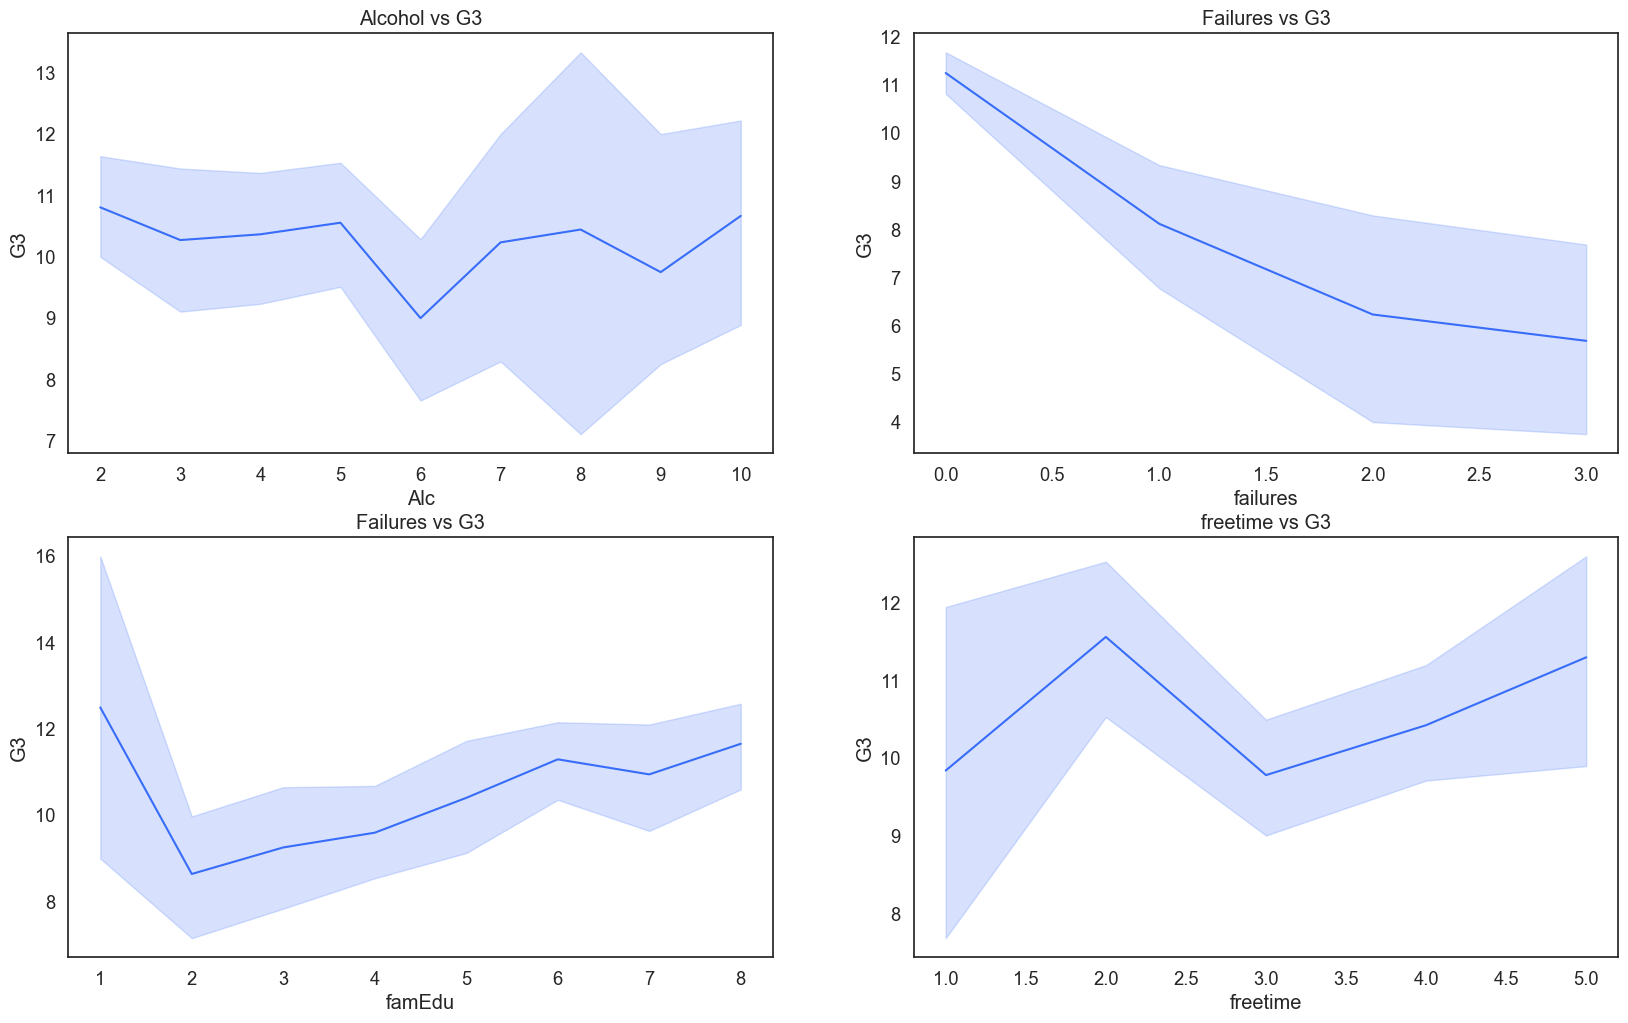

In [1237]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.lineplot(x='Alc', y='G3', data=data).set_title('Alcohol vs G3')
fig.add_subplot(2, 2, 2)
sns.lineplot(x='failures', y='G3', data=data).set_title('Failures vs G3')
fig.add_subplot(2, 2, 3)
sns.lineplot(x='famEdu', y='G3', data=data).set_title('Failures vs G3')
fig.add_subplot(2, 2, 4)
sns.lineplot(x='freetime', y='G3', data=data).set_title('freetime vs G3')

#### Important Categorical Predictors

Text(0.5, 1.0, 'freetime vs G3')

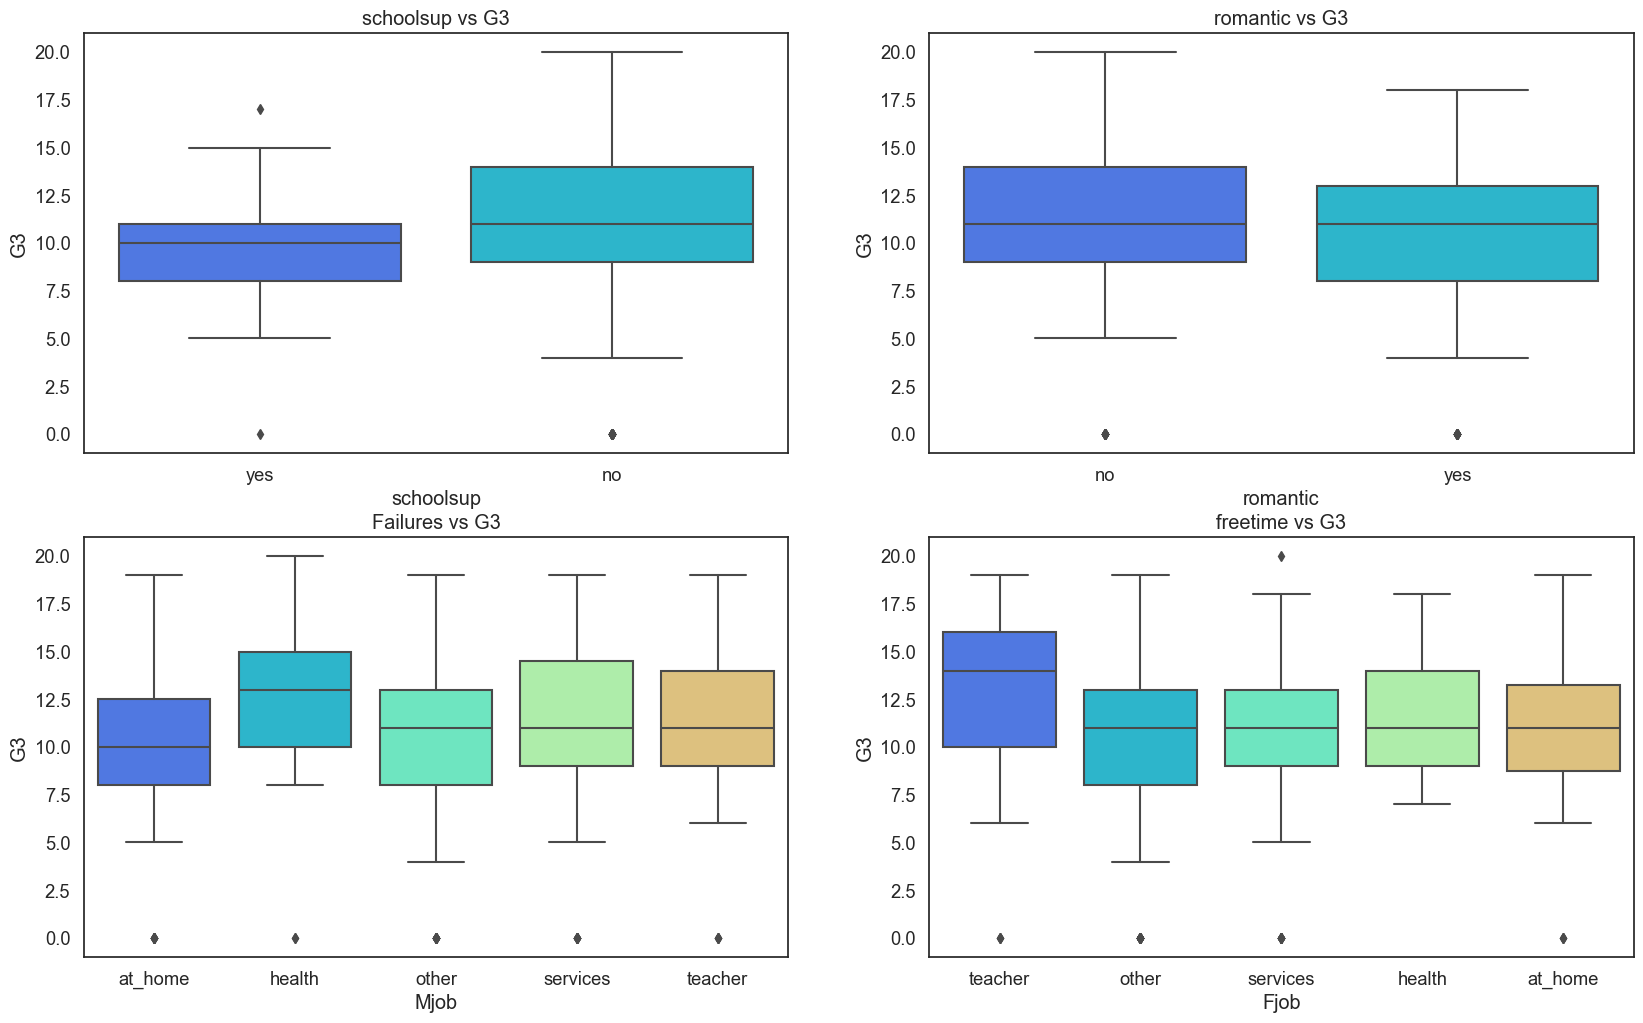

In [1329]:
data = pd.read_csv("data/student-mat.csv")
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.boxplot(x='schoolsup', y='G3', data=data).set_title('schoolsup vs G3')
fig.add_subplot(2, 2, 2)
sns.boxplot(x='romantic', y='G3', data=data).set_title('romantic vs G3')
fig.add_subplot(2, 2, 3)
sns.boxplot(x='Mjob', y='G3', data=data).set_title('Failures vs G3')
fig.add_subplot(2, 2, 4)
sns.boxplot(x='Fjob', y='G3', data=data).set_title('freetime vs G3')

#### EDA for Nested Model
*Yuyan Zhang*

#### EDA for Progress Model
*Yiru Zhang*

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

#### Base Model Development
*Victoria*

In [1319]:
######-----------Shuffling the dataset via train-test split for K-fold------------#########

# Import the train_test_split and KFold function
from sklearn.model_selection import train_test_split, KFold

# create a copy of the cleaned and transformed data frame and assign it to data (for base model development)
data = df.copy()
predictor_cols = [col for col in data.columns.tolist() if col not in ['G1', 'G2', 'G3']]

X = data[predictor_cols]

y = data.G3

# Define the KFold cross-validation object with 10 splits, a random state of 1, and shuffling enabled
k_fold = KFold(n_splits=10, random_state=1, shuffle=True)

# Split the data into training and test sets using the train_test_split function
# The test set will be 20% of the total data and the random state is set to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f"dimension of training set: {X_train.shape}\ndimension of testing set: {X_test.shape}")
# Display the first 5 rows of the training set

dimension of training set: (316, 41)
dimension of testing set: (79, 41)


#### Important Quantitative Predictors

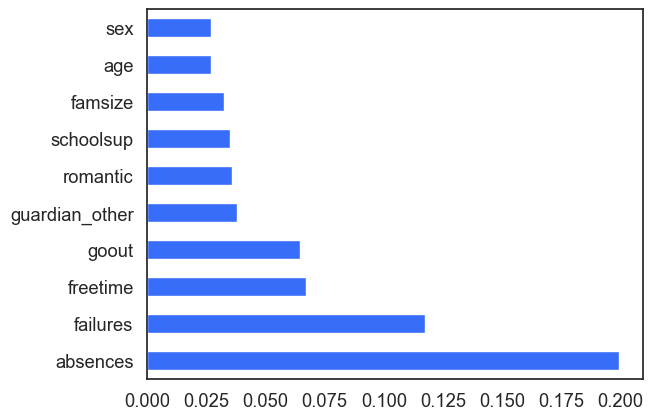

In [1320]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=1)
model_tree.fit(X_train, y_train)
importance = pd.Series(model_tree.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.show()

#### Important Categorical Predictors

In [1322]:
from sklearn.feature_selection import SelectKBest, chi2

X_cat = X.drop(columns='Alc')

In [1326]:
X_cat = X_cat.loc[:, [col for col in X_cat.columns if col not in num_col]]

In [1328]:
k_best = SelectKBest(score_func=chi2, k=5).fit(X_cat, y)
df_score = pd.Series(data=k_best.scores_, index=X_cat.columns)
df_score.sort_values(ascending=False)

schoolsup            28.319018
Fjob_teacher         23.133348
Mjob_at_home         22.615347
Mjob_health          22.416110
Mjob_services        21.588835
romantic             20.089526
reason_reputation    17.224393
paid                 16.129900
reason_other         16.029481
Fjob_services        15.848654
guardian_other       14.756544
Mjob_teacher         14.335581
Mjob_other           10.986426
reason_course        10.834210
sex                  10.581662
school               10.310678
Fjob_at_home          9.673993
Fjob_other            9.458952
Fjob_health           9.122874
activities            7.601049
reason_home           7.360289
guardian_father       7.185972
address               5.876113
famsup                5.303438
famsize               5.042650
nursery               3.297083
internet              2.999142
guardian_mother       2.892857
Pstatus               1.711150
higher                1.234479
dtype: float64

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.